## Grant Doyle Final IMDB Movie Project 

## K-State Honor Pledge:  "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." - Grant Doyle

### Business Understanding
#### The goal of this project is to predict how successful a movie will be before release. There are many factors that go into a movie during production that will determine if it is a box office smash or a bust! The dataset we will be using is the IMDB Movie dataset. This dataset is the main hub for any and all data relating to movies. They track data on the actors, budget, and ultimately the IMDB score fo the movie. They have rated and monitored movies from all the way back to 1940's to today's most current films! 

#### There is a lot of great data coming from the IMDB dataset. I will be doing some cleaning of the data which may remove some records or even some columns but if I could improve this dataset I would like to see a field that tracks the pre-release anticipation from audiences. That would be a really good predictor of how our movie will turn out and it would be somewhat easy to collect. I would also like to see a field that tracks how many other movies are coming out that fall in the same genre. Because having another movie come out in the same genre is an increased competition more so than just having another movie out. Lastly, I would like a column that tracks if there is a big/ highly anticiapted movie releasing at the same time as ours, this would just be a 1 for yes, 0 for no column. 

In [499]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#ensemble classifiers
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D

In [407]:
pd.set_option('display.max_colwidth', -1) 
pd.set_option('display.max_columns', None)

In [408]:
df = pd.read_csv("C:\\Users\\Grant\\Desktop\\665\\popculture-imdb-5000-movie-dataset\\movie_metadata.csv\\movie_metadata.csv")

In [409]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

#### We need to identify which variables are highly correlated to IMDB score. 

In [411]:
corr_imdb = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr_imdb.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808
actor_1_facebook_likes,0.076099


#### From our correlation we can notice that there are no variables that are highly correlated to our IMDB score. The highest correlation we see is in the casts total amount of facebook likes which doesn't really give us a good understanding on how to score/rate a movie. We should continue further analysis! 

### Data Understanding 
#### We now need to begin to understand our data. Here we will describe our data, speak on data quality issues, identify data types, and lastly, Identify value counts of selected columns that we consider to be important to predict a movies IMDB score or the overall success. 

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

#### We can see that we have quite a bit of columns that have missing values. The maximum amount of records shown is 5043. The minimum number of records in a field is 4159 in our "Gross" column. This is a concerning truth. Gross is a VERY important column because what a movie Grosses in earnings is a HUGE factor on if they are successful or not. Since we do have a large dataset it would be acceptable to delete those rows where the value is null HOWEVER, that is close to a thousand rows that would be deleted in the gross column. I believe that we should keep these rows because within those thousand rows, I believe are a few stories to be told. Maybe those rows that would be deleted may not be able to tell us much about gross but maybe have a unique story to tell us from another field. For this reason we will be replacing null values in columns with a major amount of null values.

#### Now that we have a better understanding of our data it is time to clean up and prepare our data!

### Data Preparation

In [413]:
# Here we read in our csv again and call it as data
# Next we create an array of all of the columns that we feel are important to keep. 
# We then set 'English' and 'USA' as a filler for null values in the dataframe. 

# This cleaning code is courtesy of https://github.com/tousif101/MoviePredictor/blob/master/movie_data_clean.py
import random

data = pd.read_csv("C:\\Users\\Grant\\Desktop\\665\\popculture-imdb-5000-movie-dataset\\movie_metadata.csv\\movie_metadata.csv", index_col=False)

keep_col = ['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
            'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'language',
            'country', 'content_rating', 'budget', 'title_year', 'imdb_score', 'movie_facebook_likes']

new_file = data[keep_col]

new_data = new_file.fillna(new_file.mean())

new_data = new_data[new_data.language == 'English']
new_data = new_data[new_data.country == 'USA']

new_data = new_data[new_data.content_rating != 'TV-14']
new_data = new_data[new_data.content_rating != 'TV-PG']
new_data = new_data[new_data.content_rating != 'TV-MA']
new_data = new_data[new_data.content_rating != 'TV-G']
new_data = new_data[new_data.content_rating != 'TV-Y7']
new_data = new_data[new_data.content_rating != 'Passed']
new_data = new_data[new_data.content_rating != 'Approved']
new_data = new_data[new_data.content_rating != 'Not Rated']
new_data = new_data[new_data.content_rating != 'Unrated']
new_data = new_data[new_data.content_rating != 'NC-17']
new_data = new_data[pd.notnull(new_data['content_rating'])]

new_data = new_data.reset_index()

for i in range(0, len(new_data['genres'])):
    record = new_data.loc[i, 'genres']
    splitVal = record.split('|')
    val = random.choice(splitVal)
    new_data.iloc[i, new_data.columns.get_loc('genres')] = val

new_data = new_data.reset_index()

cleaned_data = new_data

cleaned_data.to_csv("cleaned_movie_metadata.csv",index =False)
df = cleaned_data
# This cleaning code is courtesy of https://github.com/tousif101/MoviePredictor/blob/master/movie_data_clean.py

#### One of the majors hurdles when making a prediction is accounting for outliers. Outliers can throw your prediction off in many ways which leads to a misjudgement of data and business understanding. It also makes our model less accurate. To solve this issue we will look at our quantitative variables and look for outliers. We will then delete the rows will values that lie outside out quartile ranges. 

In [414]:
# This will remove only EXTREME outliers in our gross column. Those who fall in the 1% and 99%
quantsG = list(df.gross.quantile([0.01,0.5,0.99]))
q1G = quantsG[0]
MedianG = quantsG[1]
q3G = quantsG[2]
IRQG = q3G - q1G
LowerThreshG = MedianG - (1.5 * (IRQG))
UpperThreshG = MedianG + (1.5 * (IRQG))

df = df[df.gross <= UpperThreshG]

In [415]:
# This will remove only EXTREME outliers in our budget column. Those who fall in the 1% and 99%
quantsB = list(df.budget.quantile([0.01,0.5,0.99]))
q1B = quantsB[0]
MedianB = quantsB[1]
q3B = quantsB[2]
IRQB = q3B - q1B
LowerThreshB = MedianB - (1.5 * (IRQB))
UpperThreshB = MedianB + (1.5 * (IRQB))

df = df[df.budget <= UpperThreshB]


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 21 columns):
level_0                      3417 non-null int64
index                        3417 non-null int64
director_name                3417 non-null object
num_critic_for_reviews       3417 non-null float64
duration                     3417 non-null float64
director_facebook_likes      3417 non-null float64
actor_1_facebook_likes       3417 non-null float64
gross                        3417 non-null float64
genres                       3417 non-null object
actor_1_name                 3417 non-null object
movie_title                  3417 non-null object
num_voted_users              3417 non-null int64
cast_total_facebook_likes    3417 non-null int64
num_user_for_reviews         3417 non-null float64
language                     3417 non-null object
country                      3417 non-null object
content_rating               3417 non-null object
budget                       3417 non-nul

#### We can now see that all of our columns have the same number of values! 

In [417]:
df.describe()

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3.417000e+03,3.417000e+03,3417.000000,3417.000000,3.417000e+03,3417.000000,3417.000000,3417.000000
mean,1712.787240,2244.318408,153.287484,108.236582,861.148376,7800.849576,5.506370e+07,9.782469e+04,11624.904302,306.169246,3.831791e+07,2003.029558,6.331782,8499.781095
std,986.847764,1415.827451,122.332813,21.434859,3236.135659,16276.716574,6.519688e+07,1.499582e+05,19710.469539,389.102516,4.162687e+07,9.924746,1.092481,20632.901372
min,1.000000,1.000000,1.000000,37.000000,0.000000,0.000000,7.030000e+02,6.000000e+00,0.000000,1.000000,1.100000e+03,1936.000000,1.600000,0.000000
25%,859.000000,1013.000000,63.000000,94.000000,10.000000,775.000000,1.280119e+07,1.419300e+04,2060.000000,90.000000,1.000000e+07,1999.000000,5.700000,0.000000
50%,1713.000000,2135.000000,125.000000,104.000000,57.000000,1000.000000,3.793978e+07,4.581500e+04,4146.000000,187.000000,2.500000e+07,2005.000000,6.400000,215.000000
75%,2567.000000,3380.000000,211.000000,118.000000,220.000000,12000.000000,6.782357e+07,1.156870e+05,16004.000000,371.000000,5.000000e+07,2010.000000,7.100000,10000.000000
max,3421.000000,5042.000000,813.000000,330.000000,23000.000000,640000.000000,5.333161e+08,1.689764e+06,656730.000000,4667.000000,3.000000e+08,2016.000000,9.300000,349000.000000


### Business Intelligence  

In [418]:
#I am curious to see how budget and gross correlate to each other. Lets do a few things to see how they work!
corr_bud_gross = pd.DataFrame(df.corr()['budget'].drop('budget'))
corr_bud_gross.sort_values(['budget'], ascending = False)

,budget
gross,0.618869
num_critic_for_reviews,0.484344
num_user_for_reviews,0.400760
num_voted_users,0.394525
movie_facebook_likes,0.327965
duration,0.298004
title_year,0.232780
cast_total_facebook_likes,0.229628
actor_1_facebook_likes,0.154061
director_facebook_likes,0.095061


#### As we can see budget is most highly correlated with our gross value. Which means the higher the budget is for the film, the higher dollar amount we can make in our gross column! Thats a pretty good indicator on if our movie will be a FINANCIAL success!

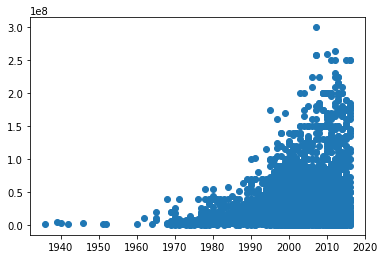

In [419]:
plt.scatter(df['title_year'], df['budget'])

#### The scatter plot above is interesting to me. You do not see the explosion of major movie budgets until the 2000's. The volume and size of these budgets more than triples in as little as 10 to 15 years! 

In [420]:
#I am curious to see how budget and gross correlate to each other. Lets do a few things to see how they work!
corr_bud_gross = pd.DataFrame(df.corr()['gross'].drop('gross'))
corr_bud_gross.sort_values(['gross'], ascending = False)

,gross
num_voted_users,0.620090
budget,0.618869
num_user_for_reviews,0.534062
num_critic_for_reviews,0.463107
movie_facebook_likes,0.360884
duration,0.264630
imdb_score,0.250124
cast_total_facebook_likes,0.213587
director_facebook_likes,0.149251
actor_1_facebook_likes,0.132081


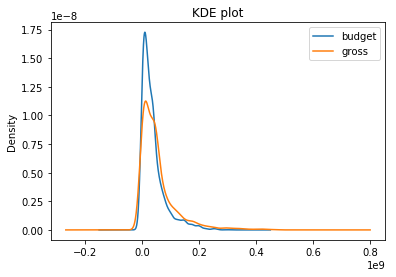

In [421]:
df[['budget', 'gross']].plot(kind='kde', title='KDE plot')

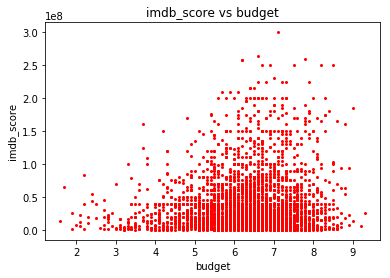

In [422]:
plt.figure(1)
plt.ylabel("imdb_score")
plt.xlabel("budget")
plt.title("imdb_score vs budget")
plt.plot(df['imdb_score'], df['budget'], "ro", markersize=2)

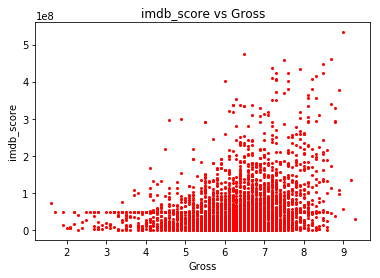

In [423]:
plt.figure(1)
plt.ylabel("imdb_score")
plt.xlabel("Gross")
plt.title("imdb_score vs Gross")
plt.plot(df['imdb_score'], df['gross'], "ro", markersize=2)

#### Here we can see that majority of the movies that have the highest imdb_score have a budget range of mid to high. We see that some of the movies that have the highest budget have a really low imdb_score which is very interesting. The graphs for budget and gross look very similar. Some of the highest grossing movies have received a low imdb_score. Both of these predictors are good columns to rely on for our prediction. 

#### Next, I would like to take a look at how duration effects imdb_score. 

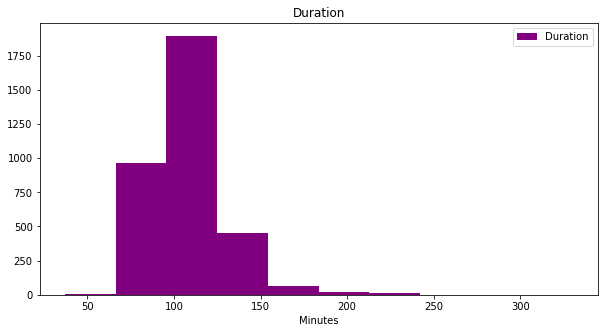

In [424]:
# histogram with more options
plt.figure(figsize = [10,5])
plt.hist(df['duration'], color='purple', label="Duration")
plt.xlabel('Minutes')
plt.title('Duration')
plt.legend()

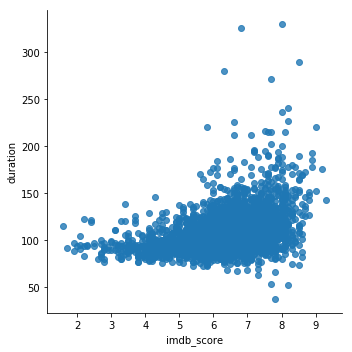

In [425]:
sns.lmplot('imdb_score', 'duration', data=df, fit_reg=False)

#### As we can see, duration isn't too good of an indicator on how good our imdb_score will be. 

## Although I was predicting that 'gross' and 'budget' would be our to biggest impactors of imdb_score, I would like to test out some other variables to see how they perform.  

#### Looking at how genre effects imdb score 

In [426]:
df['genres'].unique()

array(['Adventure', 'Action', 'Sci-Fi', 'Romance', 'Fantasy', 'Comedy',
       'Family', 'Thriller', 'Animation', 'Crime', 'Drama', 'Mystery',
       'History', 'Western', 'Sport', 'Musical', 'War', 'Horror',
       'Biography', 'Documentary', 'Music'], dtype=object)

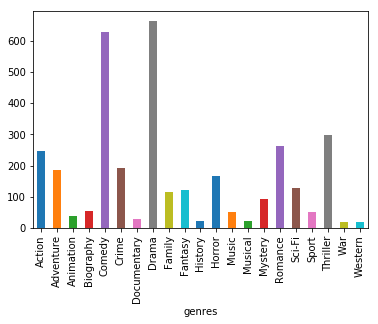

In [427]:
df.groupby('genres').size().plot(kind='bar')

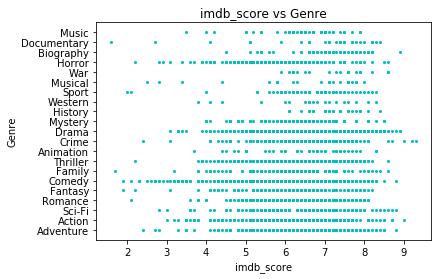

In [428]:
plt.figure(1)
plt.ylabel("Genre")
plt.xlabel("imdb_score")
plt.title("imdb_score vs Genre")
plt.plot(df['imdb_score'], df['genres'], "co", markersize=2)

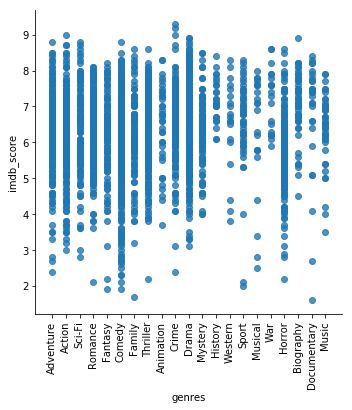

In [429]:
ax = sns.lmplot('genres', 'imdb_score', data=df, fit_reg=False)
ax.set_xticklabels(rotation=90)

### We can see that genre is not really a major factor to getting a high imdb score. 

#### Now we will look at how the number of critic reviews effect imdb score

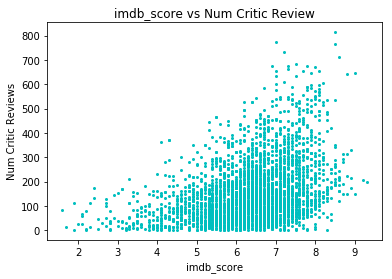

In [430]:
plt.figure(1)
plt.ylabel("Num Critic Reviews")
plt.xlabel("imdb_score")
plt.title("imdb_score vs Num Critic Review")
plt.plot(df['imdb_score'], df['num_critic_for_reviews'], "co", markersize=2)

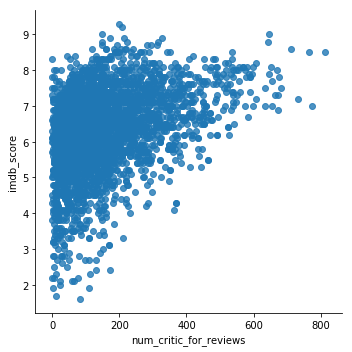

In [431]:
sns.lmplot('num_critic_for_reviews', 'imdb_score', data=df, fit_reg=False)

#### Here we can see that the number of critics reviewing a movie on imdb does effect the score they recieve. The more critics reviewing your movie the more likely you are to recieve a better score

#### The number of voted users for the movie is most likely to effect our imdb score.

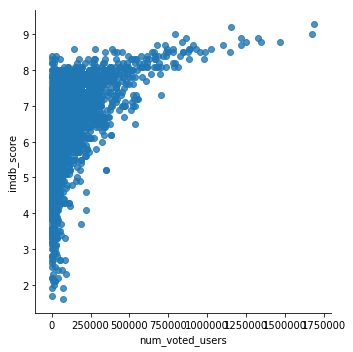

In [432]:
sns.lmplot('num_voted_users', 'imdb_score', data=df, fit_reg=False)

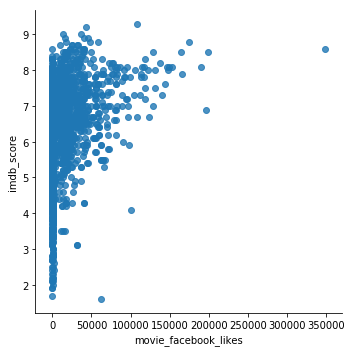

In [433]:
sns.lmplot('movie_facebook_likes', 'imdb_score', data=df, fit_reg=False)

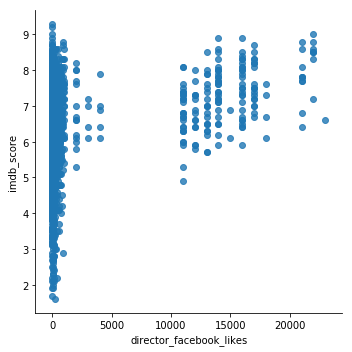

In [434]:
sns.lmplot('director_facebook_likes', 'imdb_score', data=df, fit_reg=False)

### As expected the number of voted users does effect the imdb score 

## Correlation analysis  

In [435]:
df.corr()

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
level_0,1.000000,0.996333,-0.405267,-0.335267,-0.105340,-0.158897,-0.496990,-0.362449,-0.217110,-0.341065,-0.750404,-0.161559,-0.075517,-0.233945
index,0.996333,1.000000,-0.392170,-0.333721,-0.103322,-0.157581,-0.474767,-0.351347,-0.214084,-0.328314,-0.715312,-0.153971,-0.071612,-0.223769
num_critic_for_reviews,-0.405267,-0.392170,1.000000,0.276838,0.189297,0.182850,0.463107,0.603239,0.257536,0.588771,0.484344,0.367918,0.369418,0.693401
duration,-0.335267,-0.333721,0.276838,1.000000,0.213288,0.099486,0.264630,0.370573,0.139534,0.368654,0.298004,-0.120678,0.378794,0.252111
director_facebook_likes,-0.105340,-0.103322,0.189297,0.213288,1.000000,0.091627,0.149251,0.322027,0.121626,0.248639,0.095061,-0.090990,0.219529,0.175412
actor_1_facebook_likes,-0.158897,-0.157581,0.182850,0.099486,0.091627,1.000000,0.132081,0.179893,0.949614,0.134165,0.154061,0.082508,0.121364,0.125879
gross,-0.496990,-0.474767,0.463107,0.264630,0.149251,0.132081,1.000000,0.620090,0.213587,0.534062,0.618869,0.028219,0.250124,0.360884
num_voted_users,-0.362449,-0.351347,0.603239,0.370573,0.322027,0.179893,0.620090,1.000000,0.246887,0.790649,0.394525,0.002656,0.492259,0.524431
cast_total_facebook_likes,-0.217110,-0.214084,0.257536,0.139534,0.121626,0.949614,0.213587,0.246887,1.000000,0.193515,0.229628,0.114550,0.139011,0.202195
num_user_for_reviews,-0.341065,-0.328314,0.588771,0.368654,0.248639,0.134165,0.534062,0.790649,0.193515,1.000000,0.400760,-0.004738,0.351051,0.403454


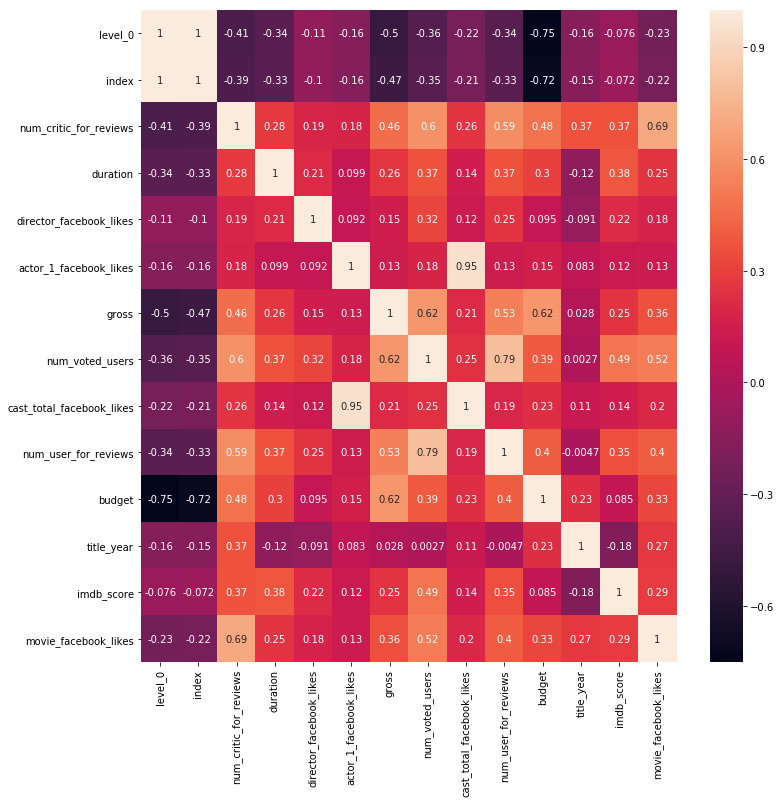

In [436]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

## We have determined that 'gross', 'budget', 'number_voted_users' , 'number_critic_reviews',  and 'duration' are the main columns we should use for predicting a movie to have a high or low imdb score! This is interesting because our correlation analysis shows correlations between imdb_score and duration as 0.38 (38%), imdb_score and gross as 0.25(25%), imdb_score and num_voted_users as 0.49(49%), imdb_score and num_user_for_reviews as 0.35(35%), and budget as 0.085 (8.5%). These correlations are relatively weak correlations but they are some of the strongest out of the bunch.  

## Summary

### The main challenge to this project was knowing when and how to handle certain issues. It is very different when a teacher is guiding you through a dataset because he already knows all of the problems in the dataset and how to fix them! One of my favorite parts was getting rid of the outliers. Outliers can ruin a dataset they can ruin correlation and prediction. This part was the most interesting to me because I am in my last statistics course for my stats minor right now and it was fun to tie the two classes today. I though what I did was clever even though the ranges I set were a little out of the ordinary. The goal of all this work is to find out what influences an imdb_score. To start out we had to understand the data, this part became more challenging to me than I expected. I understood the data and I though I knew how each variable would interact with each other. The next step was data preparation, this part was also challenging which was why I used an outside resource for help. I tried for so long to get the right amount of columns but then I would end up deleting half of my dataset. Once I read the github code for the data cleaning it began to make a lot more sense to me. Once our data is clean and prepared we can begin to start running our analysis and making visualizations. The visualizations became tricky to me. I did not want to use the same visualization over and over again and I wanted to find new ways to interpret my findings, but that proved to be rather difficult but I believe I figured it out. My hypothesis at the begining was that gross, budget, and duration would be the biggest drivers for a high imdb score. This hypothesis turned out to be somewhat true. However, I did not plan on columns such as; num_voted_users and num_user_for_reviews. I was intending for duraiton and genre to have a strong correlation but I guess once you really think about it, it doesn't matter how long a movie is, as long as it's good. And it doesn't matter what genre the movie is from as long as it does what the genre is supposed to do! Overall I really enjoyed this project. It did get frusturating at times because we were left on our own but this is what analytics will be like in real life. I was lucky enough to experience this, this summer at my internship. Unfortunetly for me the data at my work was much harder to work with. This project has expanded my scope of data analytics and understanding and I am very grateful to have this experience. 

# References 

https://github.com/tousif101/MoviePredictor/blob/master/movie_data_clean.py

In [437]:
df['category'] = 1 
df.loc[(df['imdb_score'] >= 4) & (df['imdb_score'] <= 6), 'category'] = 2
df.loc[(df['imdb_score'] > 6) & (df['imdb_score'] <= 8), 'category'] = 3
df.loc[(df['imdb_score'] > 8), 'category'] = 4

In [438]:
df.head()

,level_0,index,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,category
1,1,1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Adventure,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0,3
2,2,3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000,4
3,3,5,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Sci-Fi,Daryl Sabara,John Carter,212204,1873,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000,3
4,4,6,Sam Raimi,392.0,156.0,0.0,24000.0,336530303.0,Romance,J.K. Simmons,Spider-Man 3,383056,46055,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0,3
5,5,7,Nathan Greno,324.0,100.0,15.0,799.0,200807262.0,Fantasy,Brad Garrett,Tangled,294810,2036,387.0,English,USA,PG,260000000.0,2010.0,7.8,29000,3


# Final Project: Modeling, Evaluation, Deployment

## Modeling

### Feature Selection:

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 22 columns):
level_0                      3417 non-null int64
index                        3417 non-null int64
director_name                3417 non-null object
num_critic_for_reviews       3417 non-null float64
duration                     3417 non-null float64
director_facebook_likes      3417 non-null float64
actor_1_facebook_likes       3417 non-null float64
gross                        3417 non-null float64
genres                       3417 non-null object
actor_1_name                 3417 non-null object
movie_title                  3417 non-null object
num_voted_users              3417 non-null int64
cast_total_facebook_likes    3417 non-null int64
num_user_for_reviews         3417 non-null float64
language                     3417 non-null object
country                      3417 non-null object
content_rating               3417 non-null object
budget                       3417 non-nul

In [440]:
#Lets get rid of columns that are irrelevant to use in our model. (mainly because dummying them out would cause a headache and because common sense tells us we do not need them)
dff = df.drop(['index','director_name','actor_1_name','movie_title','language','country','level_0',
              'actor_1_facebook_likes','genres','cast_total_facebook_likes','content_rating','title_year',
               'director_facebook_likes',
              'movie_facebook_likes'], axis = 1)

In [441]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [442]:
dff.head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,imdb_score,category
1,302.0,169.0,309404152.0,471220,1238.0,300000000.0,7.1,3
2,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,8.5,4
3,462.0,132.0,73058679.0,212204,738.0,263700000.0,6.6,3
4,392.0,156.0,336530303.0,383056,1902.0,258000000.0,6.2,3
5,324.0,100.0,200807262.0,294810,387.0,260000000.0,7.8,3


## Now that we have our columns selected and all dummied out, we can begin to build our model! 

In [443]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 8 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
imdb_score                3417 non-null float64
category                  3417 non-null int64
dtypes: float64(6), int64(2)
memory usage: 240.3 KB


# Regression Models

## Linear Regression

In [444]:
y = dff['imdb_score'] 
X = dff.drop(['imdb_score', 'category'], axis = 1)

In [445]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 6 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
dtypes: float64(5), int64(1)
memory usage: 186.9 KB


In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [447]:
model2 = lm.LinearRegression()
model2.fit(X_train, y_train)
model2_y = model2.predict(X_test)

print "mean square error: ", mean_squared_error(y_test, model2_y)
print "variance or r-squared: ", explained_variance_score(y_test, model2_y)

mean square error:  0.7748019948708338
variance or r-squared:  0.34776518901673603


##  lasso Regression

In [448]:
y = dff['imdb_score'] 
X = dff.drop(['imdb_score'], axis = 1)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [450]:
#Fit the model

model1 = lm.Lasso(alpha = .01)              #higher alpha (penality parameter), fewer predictors
model1.fit(X_train, y_train)
model1_y = model1.predict(X_test)

print "mean square error: ", mean_squared_error(y_test, model1_y)
print "variance or r-squared: ", explained_variance_score(y_test, model1_y)

mean square error:  0.2418133002559414
variance or r-squared:  0.795911616843054


## Random Forest Regression

In [451]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 8 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
imdb_score                3417 non-null float64
category                  3417 non-null int64
dtypes: float64(6), int64(2)
memory usage: 240.3 KB


In [452]:
#From the correlation analysis done in the midterm project, these are the variables we need to consider
y = dff['imdb_score'] 
X = dff.drop(['imdb_score', 'category'], axis = 1)

In [453]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 6 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
dtypes: float64(5), int64(1)
memory usage: 186.9 KB


In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [455]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
#y = dff['imdb_score'] 
#X = dff.drop(['imdb_score'], axis = 1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
regr_predicted = regr.predict(X_test)

print "mean square error: ", mean_squared_error(y_test, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y_test, regr_predicted)

mean square error:  0.7008907894736842
variance or r-squared:  0.40817972385901946


## Summary of Regression models. 
### Our linear regression model has the lowest R- squared of 34%. 
### Our Random Forest regression model had an R-Squared of 40%
### Our lasso regression model had the highest R-squared of 89% 

# Classification Models

## K- Nearest Neighbors

In [456]:
y = dff['category'] 
X = dff.drop(['imdb_score', 'category'], axis = 1)

In [457]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [458]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"

0.5311890838206628
--------------------------------------------------------
[[  2  12  19   0]
 [ 18 119 197   0]
 [ 10 183 423   8]
 [  0   5  29   1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.07      0.06      0.06        33
          2       0.37      0.36      0.36       334
          3       0.63      0.68      0.65       624
          4       0.11      0.03      0.05        35

avg / total       0.51      0.53      0.52      1026

--------------------------------------------------------


## Decision Tree Classifier

In [459]:
y = dff['category'] 
X = dff.drop(['imdb_score', 'category'], axis = 1)

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [461]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 6 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
dtypes: float64(5), int64(1)
memory usage: 186.9 KB


In [462]:
# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier().fit(X_train,y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [463]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"

0.6652046783625731
--------------------------------------------------------
[[  3  10   8   0]
 [ 11 127  92   1]
 [  7  85 312   4]
 [  1   0  10  13]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.14      0.14      0.14        21
          2       0.57      0.55      0.56       231
          3       0.74      0.76      0.75       408
          4       0.72      0.54      0.62        24

avg / total       0.66      0.67      0.66       684

--------------------------------------------------------


## Random Forest Classifier

In [464]:
y = dff['category'] 
X = dff.drop(['imdb_score','category'], axis = 1)

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [466]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 6 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
dtypes: float64(5), int64(1)
memory usage: 186.9 KB


In [467]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [468]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))
#print metrics.roc_auc_score(y_train, clf.predict(X_train))

0.7153996101364523
[[  0  25   8   0]
 [  1 185 148   0]
 [  0  89 534   1]
 [  0   1  19  15]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.62      0.55      0.58       334
          3       0.75      0.86      0.80       624
          4       0.94      0.43      0.59        35

avg / total       0.69      0.72      0.70      1026



# Summary of Classification models. 
### Our K-nearest neighbor classifier is 53% accurate. 
### Our Decision tree classifier is 64% accurate.
### Our Random forest classifier is 72% accurate.

# Clustering analysis

In [469]:
# setting df equal to our X variables to perform analysis 
df = X

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 1 to 3421
Data columns (total 6 columns):
num_critic_for_reviews    3417 non-null float64
duration                  3417 non-null float64
gross                     3417 non-null float64
num_voted_users           3417 non-null int64
num_user_for_reviews      3417 non-null float64
budget                    3417 non-null float64
dtypes: float64(5), int64(1)
memory usage: 186.9 KB


In [471]:
pd.DataFrame(data = df)

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget
1,302.000000,169.0,3.094042e+08,471220,1238.0,3.000000e+08
2,813.000000,164.0,4.481306e+08,1144337,2701.0,2.500000e+08
3,462.000000,132.0,7.305868e+07,212204,738.0,2.637000e+08
4,392.000000,156.0,3.365303e+08,383056,1902.0,2.580000e+08
5,324.000000,100.0,2.008073e+08,294810,387.0,2.600000e+08
6,635.000000,141.0,4.589916e+08,462669,1117.0,2.500000e+08
7,673.000000,183.0,3.302491e+08,371639,3018.0,2.500000e+08
8,434.000000,169.0,2.000694e+08,240396,2367.0,2.090000e+08
9,313.000000,151.0,4.230326e+08,522040,1832.0,2.250000e+08
10,450.000000,150.0,8.928991e+07,181792,711.0,2.150000e+08


In [472]:
#Variance of dataframe
df.var()

num_critic_for_reviews    1.496532e+04
duration                  4.594532e+02
gross                     4.250633e+15
num_voted_users           2.248745e+10
num_user_for_reviews      1.514008e+05
budget                    1.732796e+15
dtype: float64

In [473]:
df.head(2)

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget
1,302.0,169.0,309404152.0,471220,1238.0,300000000.0
2,813.0,164.0,448130642.0,1144337,2701.0,250000000.0


In [474]:
#Normalizing dataset
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget
1,0.183143,0.207384,0.476904,0.220976,0.199707,0.872277
2,0.812454,0.190319,0.737025,0.619327,0.513251,0.705610
3,0.380188,0.081104,0.033742,0.067690,0.092548,0.751276
4,0.293981,0.163015,0.527768,0.168800,0.342013,0.732276
5,0.210237,-0.028111,0.273278,0.116576,0.017323,0.738943


In [475]:
X.var()

num_critic_for_reviews    0.022697
duration                  0.005352
gross                     0.014945
num_voted_users           0.007876
num_user_for_reviews      0.006954
budget                    0.019253
dtype: float64

In [476]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

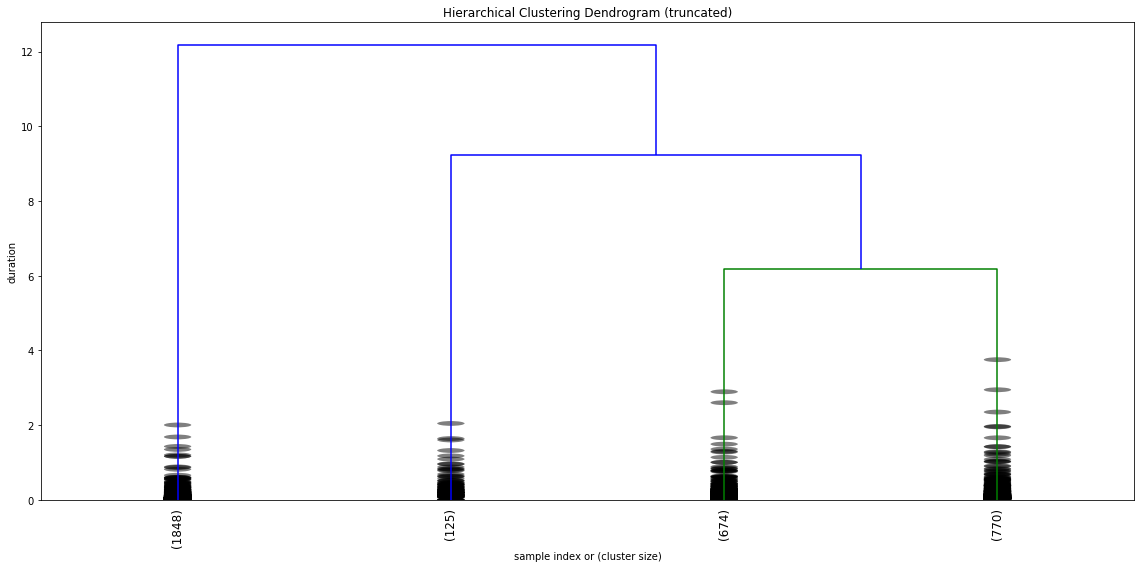

In [496]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('duration')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

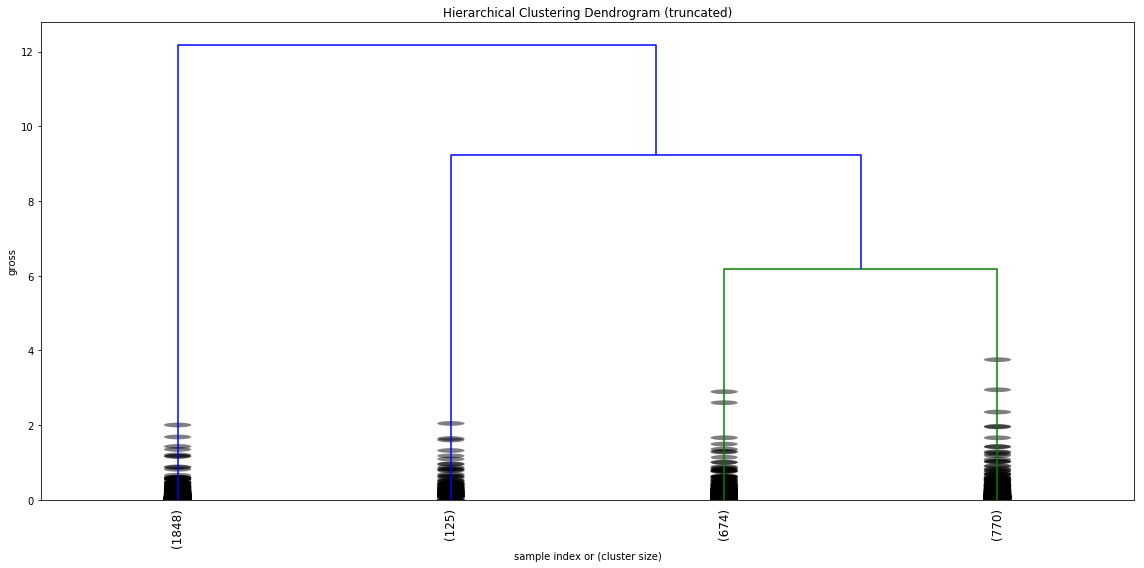

In [478]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('gross')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [479]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head(5)

,cluster
0,2
1,2
2,2
3,2
4,2


In [480]:
#joining dataframes
df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,cluster
1,302.0,169.0,309404152.0,471220,1238.0,300000000.0,2.0
2,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,2.0
3,462.0,132.0,73058679.0,212204,738.0,263700000.0,2.0
4,392.0,156.0,336530303.0,383056,1902.0,258000000.0,2.0
5,324.0,100.0,200807262.0,294810,387.0,260000000.0,2.0


In [481]:
#Mean of clusters
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget
cluster,,,,,,
0.0,153.358908,109.211964,5.646848e+07,102705.079324,299.270481,3.734473e+07
1.0,195.321958,113.508902,8.989348e+07,152131.594955,436.473294,6.624450e+07
2.0,354.611570,123.818182,1.916360e+08,307439.132231,883.876033,1.610079e+08
3.0,124.948126,104.944482,3.295621e+07,62482.491342,224.227983,2.058641e+07


In [482]:
df2.groupby('cluster').size()

cluster
0.0    769 
1.0    674 
2.0    121 
3.0    1848
dtype: int64

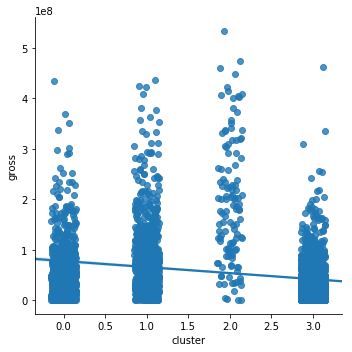

In [483]:
#Gross level for each cluster
sns.lmplot("cluster", "gross", df2, x_jitter=.15, y_jitter=.15)

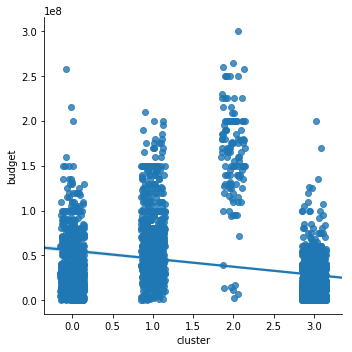

In [484]:
#Each level of budget for each cluster
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

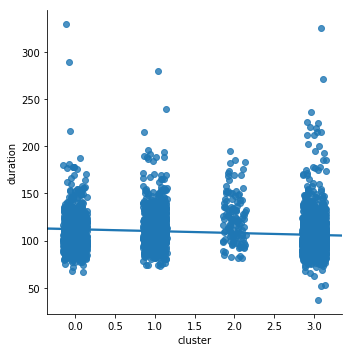

In [485]:
#Duration for each cluster
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

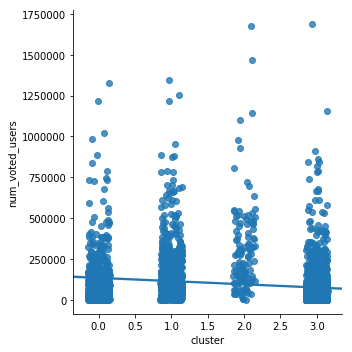

In [486]:
# Num voted users for each clusters
sns.lmplot("cluster", "num_voted_users", df2, x_jitter=.15, y_jitter=.15)

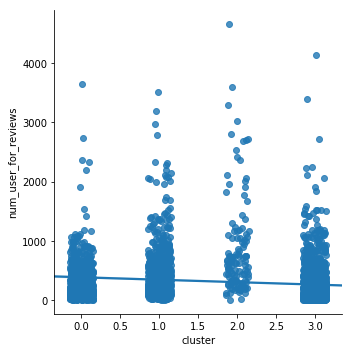

In [487]:
# Num used for reviews for each clusters
sns.lmplot("cluster", "num_user_for_reviews", df2, x_jitter=.15, y_jitter=.15)

## K-means Clustering

In [488]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [489]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 0.21221481,  0.04885714,  0.16838743,  0.1189488 ,  0.10170592,
         0.19009702],
       [-0.04602522, -0.01059615, -0.03651992, -0.02579766, -0.02205801,
        -0.04122831]])

In [490]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 0.21221481,  0.04885714,  0.16838743,  0.1189488 ,  0.10170592,
         0.19009702],
       [-0.04602522, -0.01059615, -0.03651992, -0.02579766, -0.02205801,
        -0.04122831]])

In [491]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [492]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,cluster
0,302.0,169.0,309404152.0,471220,1238.0,300000000.0,0
1,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,0
2,462.0,132.0,73058679.0,212204,738.0,263700000.0,0
3,392.0,156.0,336530303.0,383056,1902.0,258000000.0,0
4,324.0,100.0,200807262.0,294810,387.0,260000000.0,0


In [493]:
df2.groupby(['cluster']).mean() 

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget
cluster,,,,,,
0,325.605911,122.551724,1.448673e+08,298819.374384,780.729064,9.534681e+07
1,115.915004,105.131910,3.558707e+07,54232.892806,203.246550,2.594946e+07


In [494]:
df2.groupby(['cluster']).size() 

cluster
0    609 
1    2808
dtype: int64

In [495]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget
cluster,,,,,,
0,325.605911,122.551724,1.448673e+08,298819.374384,780.729064,9.534681e+07
1,115.915004,105.131910,3.558707e+07,54232.892806,203.246550,2.594946e+07


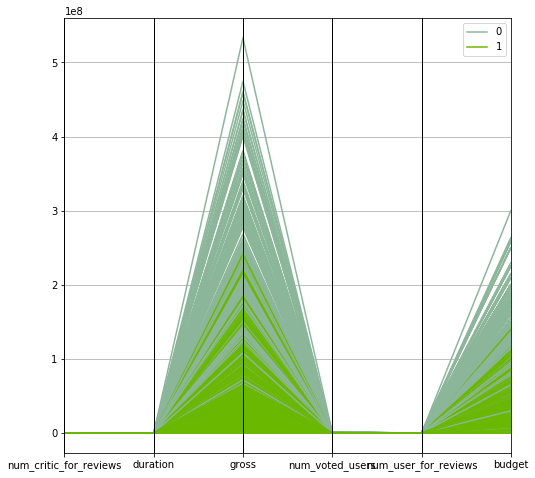

In [497]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(df2, 'cluster')

Text(0.5,0,'budget')

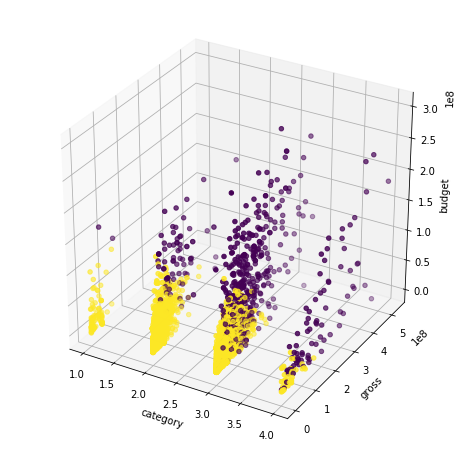

In [503]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = dff['category']
y = dff['gross']
z = dff['budget'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('category')
ax.set_ylabel('gross')
ax.set_zlabel('budget')

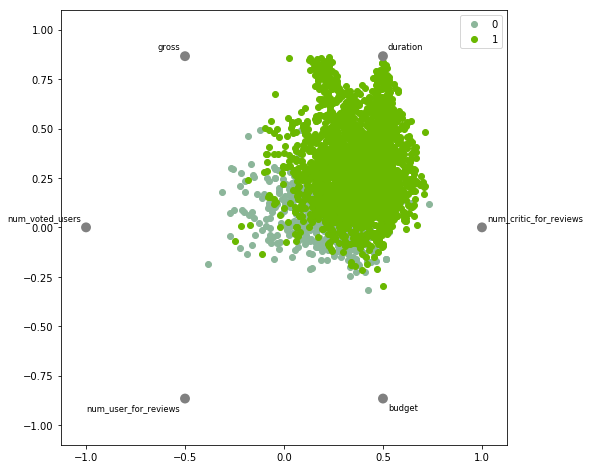

In [504]:
from pandas.plotting import radviz

plt.figure(figsize=(8,8))
radviz(df2, "cluster")

## Summary

### From using the first part of this project, "Mid-term" I determined that the important and more relevant columns to include in our model. From our variance and and analysis I decided to keep "gross, budget, duration, num_voted_users, and num_user_for_reviews" These features were highly (more so than others) correlated with our imdb_score. These variables prove to be good to use in our models because our R-Squared is still very high for our lasso model and our random forest classifier. 
### For our client: 
### In order to have a successful movie it is important that you encourage people to vote for your movie. The number of people who vote for a movie is directly related to how the IMDB_Score performs. 
### The Second thing the client must focus on is the budget for the movie. Budget and IMDB_Score are correlated and budget is a good indicator for how the IMDB score will go. Although budget isn't the highest correlated value the graph shows a good correlation. 
### The third variable our client should consider is gross revenue. Gross revenue is a great indicator to imdb score and has a 25% correlation rating. We can make the assumption that a movie that is liked by many people will attract more people and increase revenues. 
### The fourth variable to consider is duration. Duration is highly correlated to IMDB score at around 38%. The longer a movie is the more people will like it, the more the story can be developed, and the better the IMDB score.
### The fifth variable to consider is number critic for reviews, this is also a highly correlated variable at around 37%. 
### The sixth variable to consider is number of users for reviews, this is correlated to 35% of our imdb score. 